In [18]:
#βιβλιο΄θήκες
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#μετρικές
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
#svm 
from sklearn import svm
#mlp
from sklearn.neural_network import MLPClassifier
#openml.org datasets
from sklearn.datasets import fetch_openml
from time import process_time
from sklearn.preprocessing import LabelEncoder as le
import seaborn as sns

#παραμετροι για το μεγεθος των διαγραμματων
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
sns.set(font_scale=1.5)

In [3]:
#εισαγωγή datasets
#απο sklearn datasets
digits = sklearn.datasets.load_digits()


#απο openml
creditg = fetch_openml(name='credit-g')
bloodtrans = fetch_openml(name = 'blood-transfusion-service-center')
waveform = fetch_openml(name='waveform-5000')
vowel = fetch_openml(name = 'vowel')
tictactoe = fetch_openml( name ='tic-tac-toe')
steelplatesfault = fetch_openml( name = 'steel-plates-fault')
qsar = fetch_openml( name = 'qsar-biodeg')
phoneme = fetch_openml( name = 'phoneme')
spambase = fetch_openml( name = 'spambase')
diabetes = fetch_openml( name = 'diabetes')
hillvalley = fetch_openml( name = 'hill-valley')
kc1 = fetch_openml(name = 'kc1')
pc3 = fetch_openml(name = 'pc3')
scene = fetch_openml(name = 'scene')

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\datasets\openml.py:317: UserWarning: Multiple active versions of the dataset matching the name waveform-5000 exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\datasets\openml.py:317: UserWarning: Multiple active versions of the dataset matching the name vowel exist. Versions may be fundamentally different, returning version 2.
  " {version}.".format(name=name, version=res[0]['version']))
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\datasets\openml.py:317: UserWarning: Multiple active versions of the dataset matching the name steel-plates-fault exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\datasets\openml.py:317: UserWarning: Multiple active versions of the dataset ma

In [4]:
#συνάρτηση μετατροπής των datasets σε pandas
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

In [5]:
#μετατρoπή σε dataframe
df_creditg = sklearn_to_df(creditg)
df_bloodtrans = sklearn_to_df(bloodtrans)
df_waveform = sklearn_to_df(waveform)
df_vowel = sklearn_to_df(vowel)
df_tictactoe = sklearn_to_df(tictactoe)
df_steelplatesfault = sklearn_to_df(steelplatesfault)
df_qsar = sklearn_to_df(qsar)
df_phoneme =sklearn_to_df(phoneme)
df_spambase =sklearn_to_df(spambase)
df_diabetes =sklearn_to_df(diabetes)
df_hillvalley =sklearn_to_df(hillvalley)
df_kc1 =sklearn_to_df(kc1)
df_pc3 = sklearn_to_df(pc3)
df_scene = sklearn_to_df(scene)

#η συνάρτηση δεν δουλεύει για digits οπότε εισάγουμε ξεχωριστά
df_digits = pd.DataFrame(sklearn.datasets.load_digits().data)
df_digits['target'] = pd.Series(digits.target)

#λιστα 
datasets = [df_creditg,df_bloodtrans,df_waveform,df_vowel,df_tictactoe,df_steelplatesfault,
            df_qsar,df_phoneme,df_spambase,df_diabetes,df_hillvalley,df_digits,df_kc1,df_pc3,df_scene]


In [6]:
#συνάρτηση εκπαίδευσης
def train_dataset(dataset):
    from sklearn.model_selection import GridSearchCV
    #Εκπαίδευση SVM  με το  dataset
    #Διαχωρισμός σε Χ και y
    X = dataset.iloc[:,:-1]
    y = dataset.iloc[:,-1]

    
    #μετατροπη των εξόδων απο string σε int
    from sklearn.preprocessing import LabelEncoder

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    
    
    #Κανονικοποίηση των δεδομένων
    X= preprocessing.StandardScaler().fit(X).transform(X)



    # Διαχωρισμός των δεδομ΄ένων σε δεδομένα εκπαίδευσης και δεδομένα ελεγχου με αναλογία 5 προς 1 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    #Εκπαιδευση των SVM
    from sklearn import svm
    
    
    #rbf kernel
    rbf_param = {'kernel': ['rbf'], 'C':[0.1, 1,5,10,20],'gamma' :[0.0001,0.001,0.01,0.1,1,10,100,'auto']}
    rbf_clf = GridSearchCV(svm.SVC(), rbf_param, cv=5, scoring='accuracy', n_jobs= -1, refit = True)
    rbf_clf.fit(X_train, y_train)
    rbf_svm_t = rbf_clf.refit_time_

    #linear kernel
    liblinear = svm.LinearSVC(max_iter = 1000)
    linear_param = {'C':[0.1, 1,5,10,20],}
    linear_clf = GridSearchCV(liblinear, linear_param, cv=5, scoring='accuracy', n_jobs= -1, refit = True)
    linear_clf.fit(X_train, y_train)
    linear_svm_t = linear_clf.refit_time_
    
    #poly kernel
    poly_param = {'kernel': ['poly'], 'C':[0.1, 1,5,10,20], 'degree' : [2,3,4,5,6], 'gamma' :['auto']}
    poly_clf = GridSearchCV(svm.SVC(), poly_param, cv=5, scoring='accuracy', n_jobs= -1, refit = True)
    poly_clf.fit(X_train, y_train)
    poly_svm_t = poly_clf.refit_time_
    
    
    
    #sigmoid kernel
    sigmoid_param = {'kernel': ['sigmoid'], 'C':[0.1, 1,5,10,20],'gamma' :['auto']}
    sigmoid_clf = GridSearchCV(svm.SVC(), sigmoid_param, cv=5, scoring='accuracy', n_jobs= -1, refit = True)
    sigmoid_clf.fit(X_train, y_train)
    sigmoid_svm_t = sigmoid_clf.refit_time_

    #mlp
    mpl_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
    t4 = process_time()
    mpl_clf.fit(X_train, y_train)
    mpl_t =  process_time()- t4


    #predict στα δεδομενα ελ΄΄εγχου
    rbf_yhat_svm = rbf_clf.predict(X_test)
    linear_yhat_svm = linear_clf.predict(X_test)
    poly_yhat_svm = poly_clf.predict(X_test)
    sigmoid_yhat_svm = sigmoid_clf.predict(X_test)
    mpl_yhat = mpl_clf.predict(X_test)

    #λιστα με αποτελέσματα
    rbf_SVM = []
    linear_SVM = []
    poly_SVM = []
    sigmoid_SVM = []
    mpl = []

    #οι χρόνοι
    rbf_SVM.append(rbf_svm_t)
    linear_SVM.append(linear_svm_t)
    poly_SVM .append(poly_svm_t)
    sigmoid_SVM.append(sigmoid_svm_t)
    mpl.append(mpl_t)


    rbf_SVM.append(f1_score(y_test, rbf_yhat_svm, average='weighted'))
    rbf_SVM.append(accuracy_score(rbf_yhat_svm, y_test))

    linear_SVM.append(f1_score(y_test, linear_yhat_svm, average='weighted'))
    linear_SVM.append(accuracy_score(linear_yhat_svm, y_test))

    poly_SVM.append(f1_score(y_test, poly_yhat_svm, average='weighted'))
    poly_SVM.append(accuracy_score(poly_yhat_svm, y_test))

    sigmoid_SVM.append(f1_score(y_test, sigmoid_yhat_svm, average='weighted'))
    sigmoid_SVM.append(accuracy_score(sigmoid_yhat_svm, y_test))

    mpl.append(f1_score(y_test, mpl_yhat, average='weighted'))
    mpl.append(accuracy_score(mpl_yhat, y_test))


    #δημιουργία του πίνακα αποτελεσμάτων
    data = {'rbf_SVM': rbf_SVM, 'linear_SVM': linear_SVM, 'poly_SVM' : poly_SVM, 'sigmoid_SVM' : sigmoid_SVM, "mpl" : mpl}
    labels = ["time", 'F1-score','Accuracy Score']
    report = pd.DataFrame.from_dict(data,orient='index')
    report.columns = labels
    report.index.name = 'Algorithm'

    return report

In [7]:
import warnings; warnings.simplefilter('ignore')
results = []
for i in datasets:
    report = train_dataset(i)
    results.append(report)
    

In [14]:
f = open("results.csv", 'a')
for df in results:
    df.to_csv(f)
f.close()

In [9]:
results[0].iloc[:,0]

Algorithm
rbf_SVM        0.017004
linear_SVM     0.066025
poly_SVM       0.018235
sigmoid_SVM    0.018005
mpl            0.734375
Name: time, dtype: float64

In [183]:
#Δεδομένα για χρόνο

t_data = {'creditg': results[0].iloc[:,0], 'bloodtrans': results[1].iloc[:,0], 'waveform' : results[2].iloc[:,0],
        'vowel' : results[3].iloc[:,0], "tictactoe" : results[4].iloc[:,0],'steelplatesfault' : results[5].iloc[:,0],
        'qsar': results[6].iloc[:,0], 'phoneme' : results[7].iloc[:,0], 'spambase' : results[8].iloc[:,0], 
        "diabetes" : results[9].iloc[:,0],'hillvalley': results[10].iloc[:,0], 'digits': results[11].iloc[:,0],
        'kc1' : results[12].iloc[:,0], 'pc3' : results[13].iloc[:,0], "scene" : results[14].iloc[:,0]
       }


t_pinakas = pd.DataFrame.from_dict(t_data,orient='index')
t_pinakas.index.name = 'dataset'

#δεδομένα για f1-score
f1_data = {'creditg': results[0].iloc[:,1], 'bloodtrans': results[1].iloc[:,1], 'waveform' : results[2].iloc[:,1],
        'vowel' : results[3].iloc[:,1], "tictactoe" : results[4].iloc[:,1],'steelplatesfault' : results[5].iloc[:,1],
        'qsar': results[6].iloc[:,1], 'phoneme' : results[7].iloc[:,1], 'spambase' : results[8].iloc[:,1], 
        "diabetes" : results[9].iloc[:,1],'hillvalley': results[10].iloc[:,1], 'digits': results[11].iloc[:,1],
        'kc1' : results[12].iloc[:,1], 'pc3' : results[13].iloc[:,1], "scene" : results[14].iloc[:,1]
       }

f1_pinakas = pd.DataFrame.from_dict(f1_data,orient='index')
f1_pinakas.index.name = 'dataset'

#δεδομένα για accuracy
a_data = {'creditg': results[0].iloc[:,2], 'bloodtrans': results[1].iloc[:,2], 'waveform' : results[2].iloc[:,2],
        'vowel' : results[3].iloc[:,2], "tictactoe" : results[4].iloc[:,2],'steelplatesfault' : results[5].iloc[:,2],
        'qsar': results[6].iloc[:,2], 'phoneme' : results[7].iloc[:,2], 'spambase' : results[8].iloc[:,2], 
        "diabetes" : results[9].iloc[:,2],'hillvalley': results[10].iloc[:,2], 'digits': results[11].iloc[:,2],
        'kc1' : results[12].iloc[:,2], 'pc3' : results[13].iloc[:,2], "scene" : results[14].iloc[:,2]
       }

a_pinakas = pd.DataFrame.from_dict(a_data,orient='index')
a_pinakas.index.name = 'dataset'

In [184]:
#Διαχωρισμός πινάκων σε 3 μέρη για πιο εύκολα διαγράμματα
t_pinakas_1 = t_pinakas.iloc[0:5:]
t_pinakas_2 =  t_pinakas.iloc[5:10:]
t_pinakas_3 = t_pinakas.iloc[10:16:]

f1_pinakas_1 = f1_pinakas.iloc[0:5:]
f1_pinakas_2 =  f1_pinakas.iloc[5:10:]
f1_pinakas_3 = f1_pinakas.iloc[10:16:]

a_pinakas_1 = a_pinakas.iloc[0:5:]
a_pinakas_2 =  a_pinakas.iloc[5:10:]
a_pinakas_3 = a_pinakas.iloc[10:16:]

In [197]:
compare_pinakas = t_pinakas.iloc[:,0:4].div(t_pinakas.iloc[:,4], axis= 0)
compare_pinakas.loc['mean'] = compare_pinakas.mean()

In [198]:
compare_pinakas

,rbf_SVM,linear_SVM,poly_SVM,sigmoid_SVM
dataset,,,,
bloodtrans,0.044810,0.055477,8.773082,0.010667
creditg,0.023154,0.089906,0.024831,0.024517
diabetes,0.010669,0.038103,0.027420,0.012193
digits,0.036500,0.049976,0.043805,0.028639
hillvalley,0.109583,0.183363,0.098735,0.118273
kc1,0.105624,0.126961,0.224050,0.036274
pc3,0.035818,0.132379,0.049909,0.022784
phoneme,0.189079,0.107284,1.071056,0.181967
qsar,0.029638,0.016596,0.027265,0.029636


# Διαγράμματα χρόνου

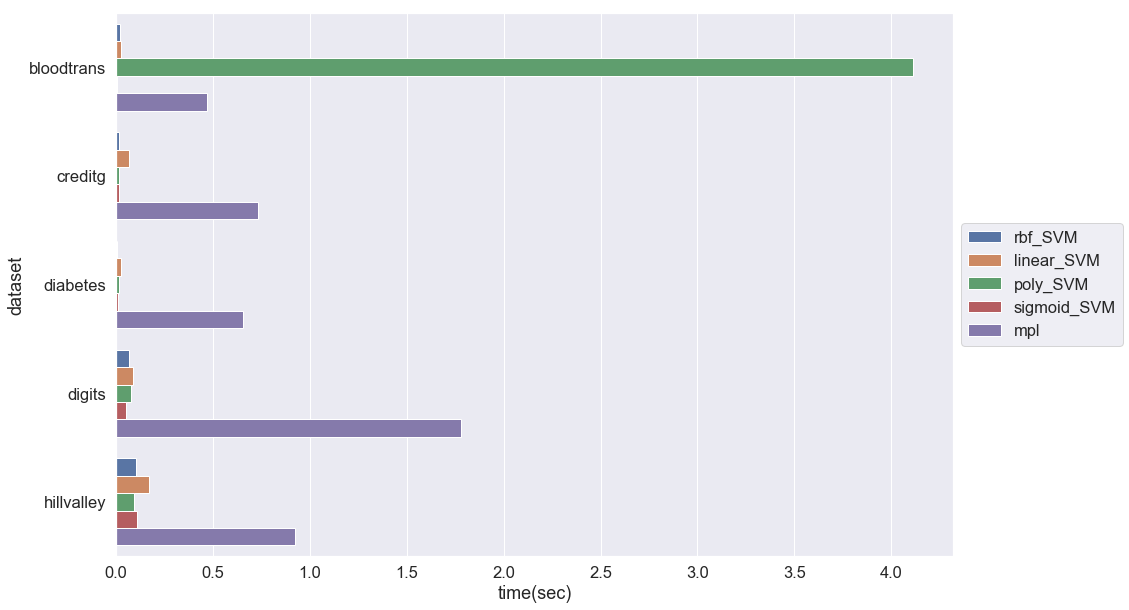

In [19]:
#δημιουργια πίνακα αποτελεσμάτων
import seaborn as sns
# convert dataframe  
df2=t_pinakas_1.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','time(sec)']
sns.barplot(data=df2,y='dataset',x='time(sec)',hue='algorithm')
from pylab import rcParams
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10

plt.show()

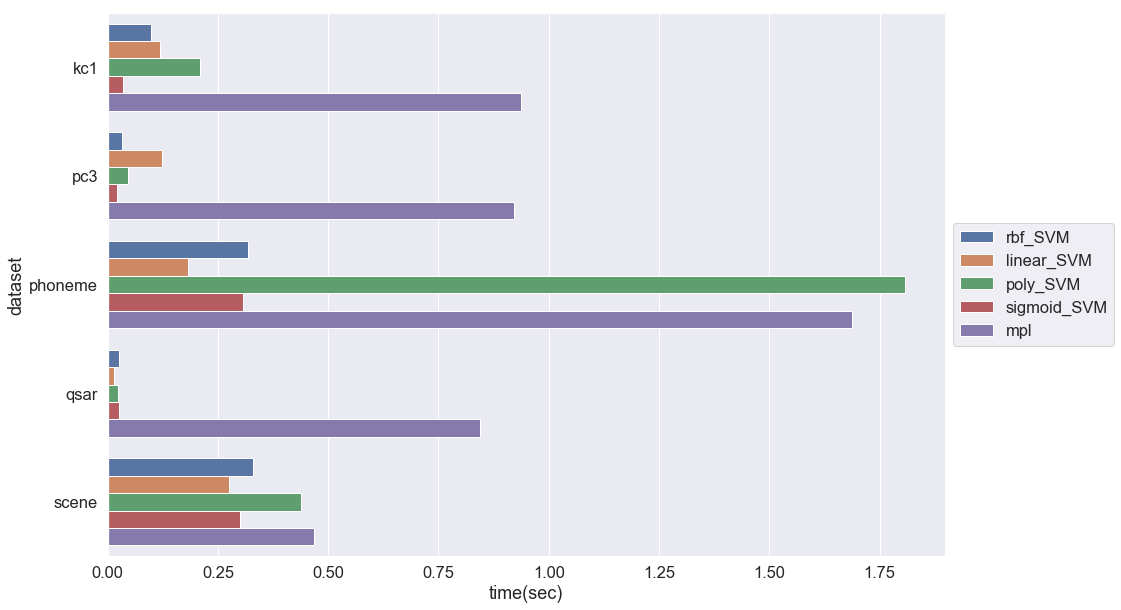

In [20]:
df2=t_pinakas_2.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','time(sec)']
sns.barplot(data=df2,y='dataset',x='time(sec)',hue='algorithm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



plt.show()

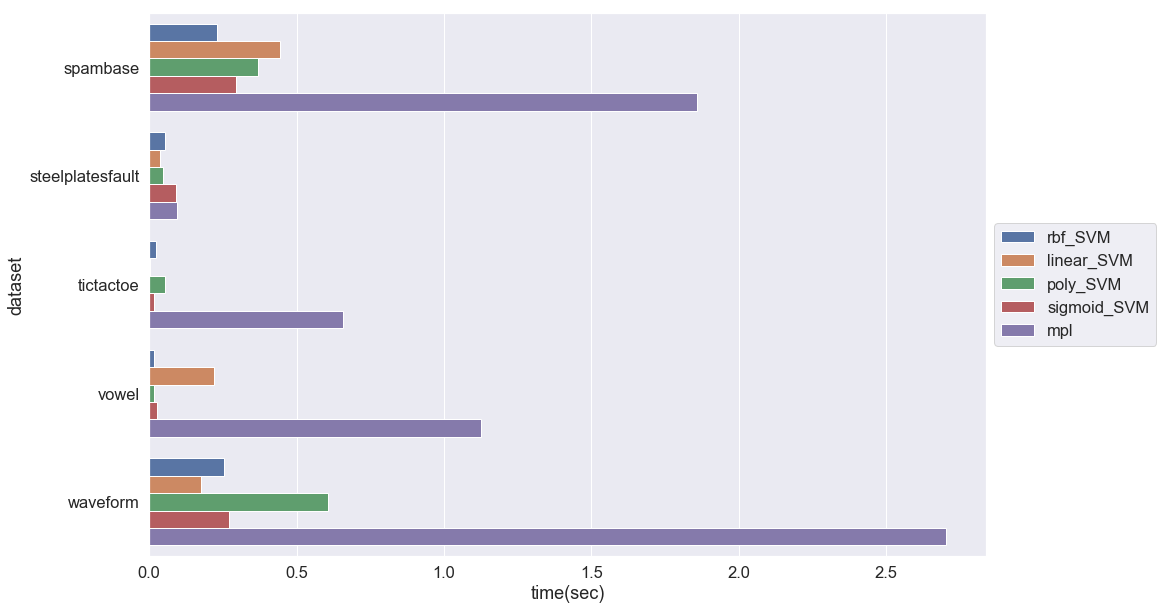

In [21]:
df2=t_pinakas_3.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','time(sec)']
sns.barplot(data=df2,y='dataset',x='time(sec)',hue='algorithm')
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# διαγραμματα accuracy

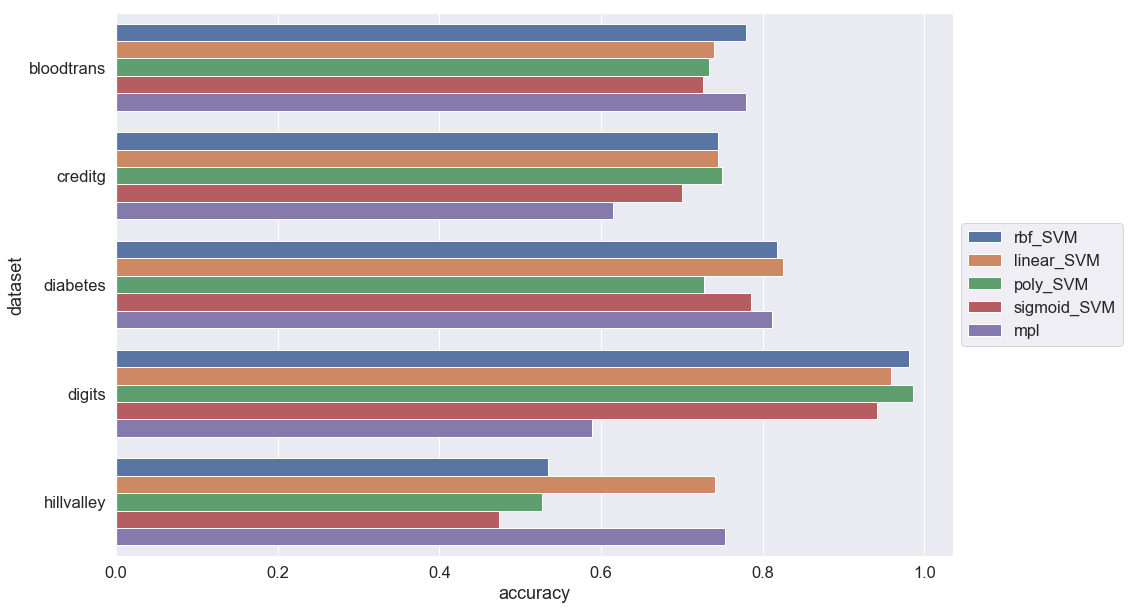

In [22]:
df2=a_pinakas_1.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','accuracy']
sns.barplot(data=df2,y='dataset',x='accuracy',hue='algorithm')
from pylab import rcParams
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10

plt.show()

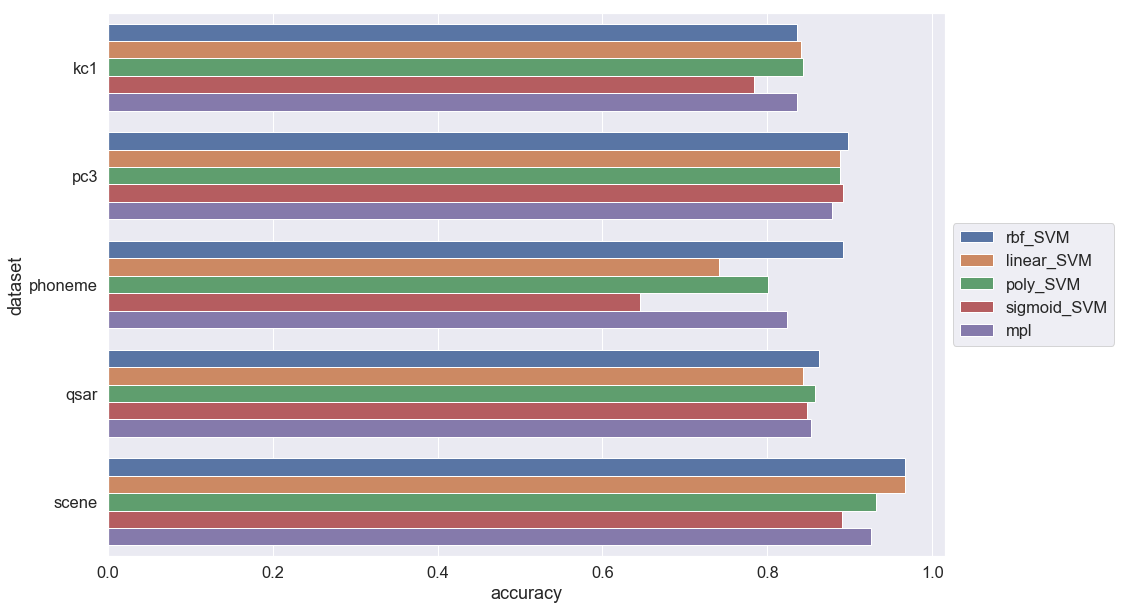

In [23]:
df2=a_pinakas_2.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','accuracy']
sns.barplot(data=df2,y='dataset',x='accuracy',hue='algorithm')
from pylab import rcParams
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10

plt.show()

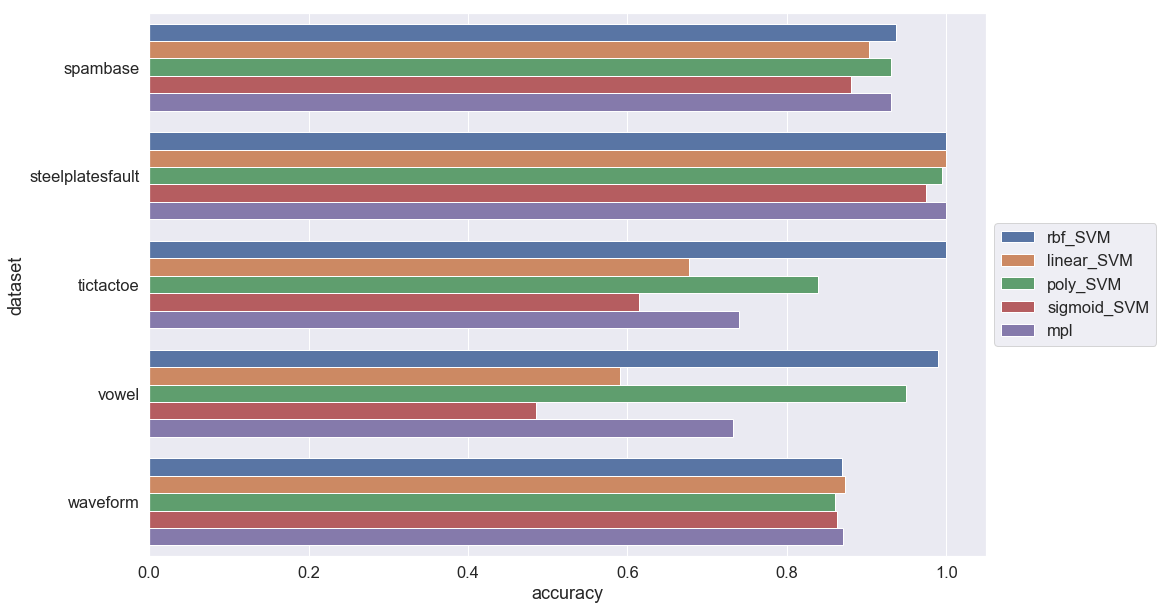

In [24]:
df2=a_pinakas_3.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','accuracy']
sns.barplot(data=df2,y='dataset',x='accuracy',hue='algorithm')
from pylab import rcParams
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10

plt.show()

# Διαγράμματα f1-score

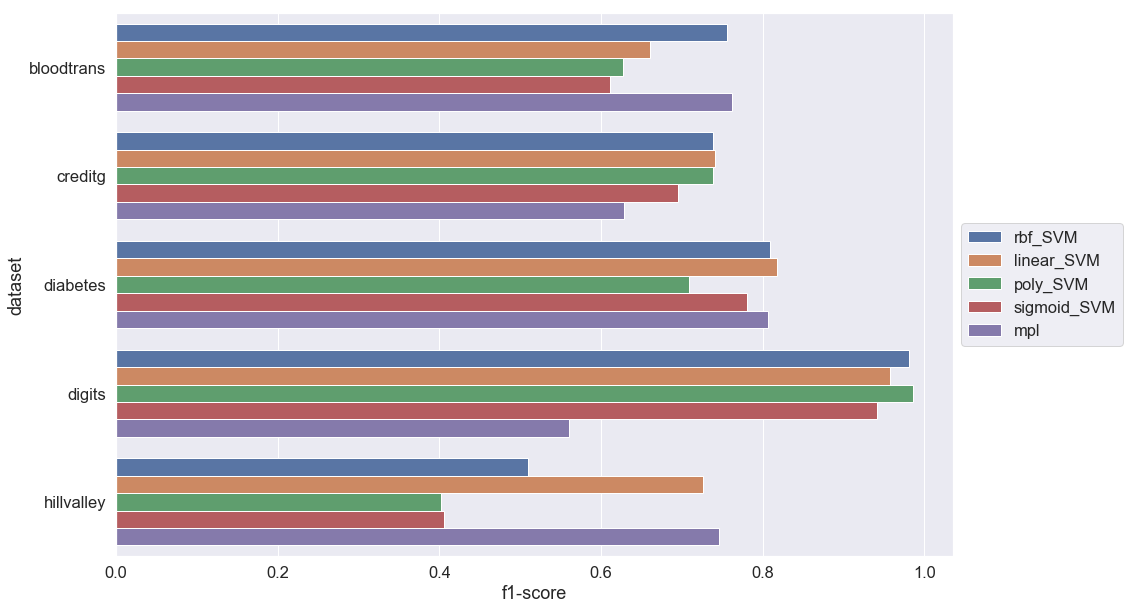

In [25]:
df2=f1_pinakas_1.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','f1-score']
sns.barplot(data=df2,y='dataset',x='f1-score',hue='algorithm')
from pylab import rcParams
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10

plt.show()

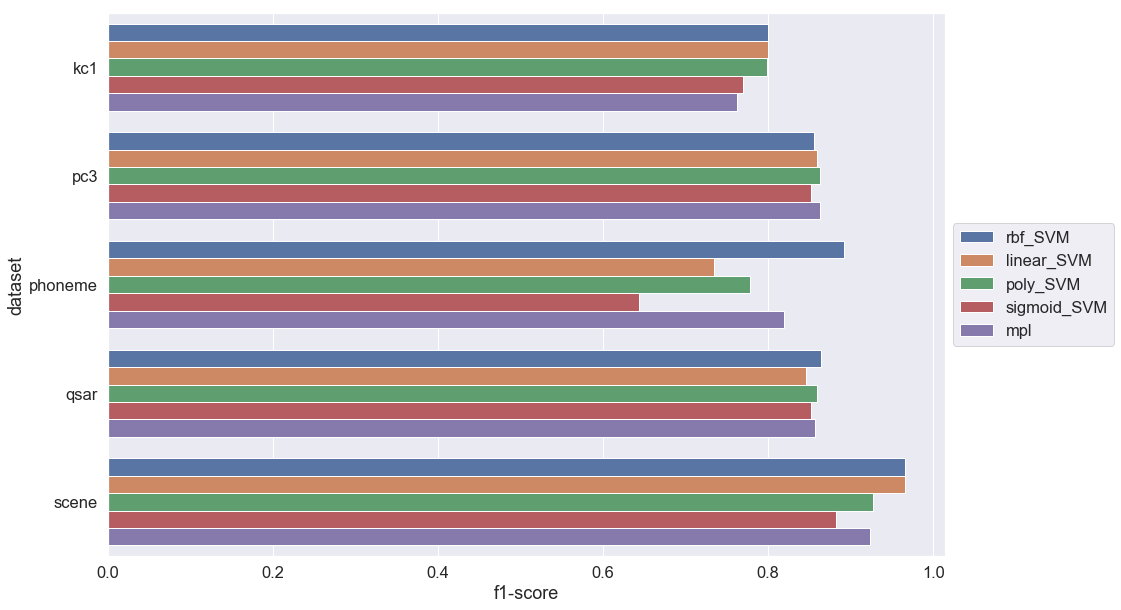

In [26]:
df2=f1_pinakas_2.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','f1-score']
sns.barplot(data=df2,y='dataset',x='f1-score',hue='algorithm')
from pylab import rcParams
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10

plt.show()

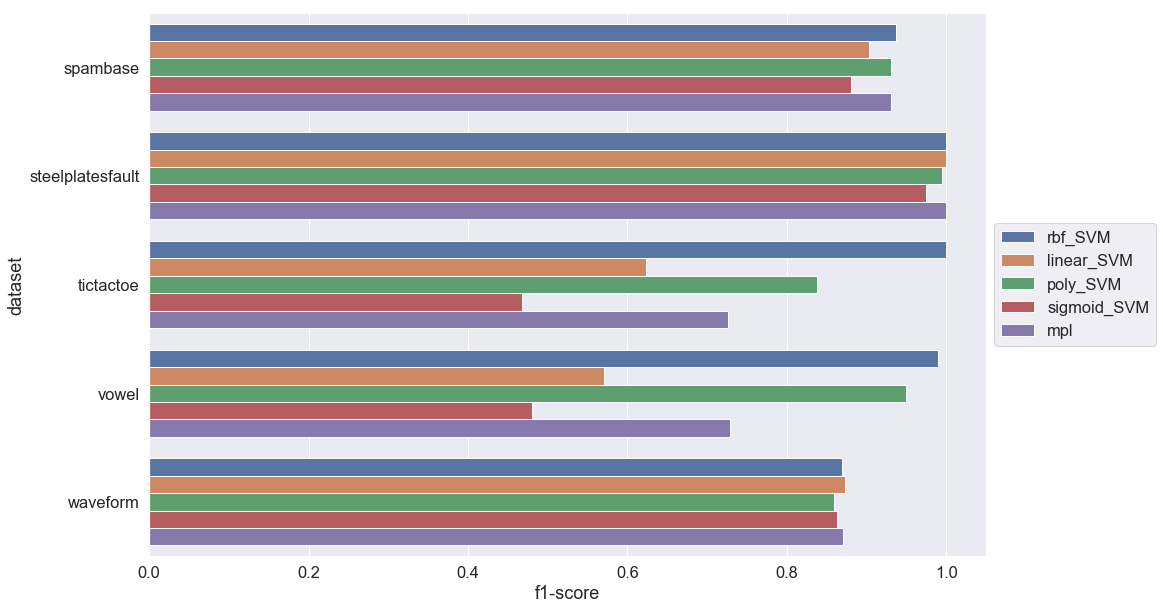

In [27]:
df2=f1_pinakas_3.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','f1-score']
sns.barplot(data=df2,y='dataset',x='f1-score',hue='algorithm')
from pylab import rcParams
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10

plt.show()

In [73]:
electricity = fetch_openml(name = 'electricity')  #45000 δειγματα
df_electricity = sklearn_to_df(electricity)  

eegeyestate = fetch_openml(name = 'eeg-eye-state')   #15000 δειγματα
df_eegeyestate = sklearn_to_df(eegeyestate)

letter = fetch_openml(name = 'letter')            # 20000 δειγματα
df_letter = sklearn_to_df(letter)
 
AP_Colon_Kidney = fetch_openml(name = 'AP_Colon_Kidney')
df_AP_Colon_Kidney = sklearn_to_df(AP_Colon_Kidney)

bank_marketing = fetch_openml(name = 'bank-marketing')
df_bank_marketing = sklearn_to_df(bank_marketing)

MiniBooNE = fetch_openml(name = 'MiniBooNE')
df_MiniBooNE = sklearn_to_df(MiniBooNE)

numerai286 = fetch_openml(name = 'numerai28.6')
df_numerai286 = sklearn_to_df(numerai286)


datasets_2 = [df_electricity, df_eegeyestate, df_letter, df_BNGvote, df_AP_Colon_Kidney, df_numerai286, df_adult]

In [74]:
#import thundersvm
from thundersvm import SVC as t_svm

In [75]:
def train_tsvm(dataset):

    #Διαχωρισμός σε Χ και y
    X = dataset.iloc[:,:-1]
    y = dataset.iloc[:,-1]


    #μετατροπη των εξόδων απο string σε int
    from sklearn.preprocessing import LabelEncoder

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)


    #Κανονικοποίηση των δεδομένων
    X= preprocessing.StandardScaler().fit(X).transform(X)



    # Διαχωρισμός των δεδομ΄ένων σε δεδομένα εκπαίδευσης και δεδομένα ελεγχου με αναλογία 5 προς 1 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    #thundersvm rbf kernel
    trbf_clf = t_svm(kernel='rbf',gamma='auto')
    t0= process_time()
    trbf_clf.fit(X_train, y_train) 
    trbf_svm_t = process_time()- t0
    
    #svm rbf kernel
    rbf_clf = svm.SVC(kernel='rbf',gamma='auto')
    t1= process_time()
    rbf_clf.fit(X_train, y_train) 
    rbf_svm_t = process_time()- t1
    
    #thundersvm linear kernel
    tlinear_clf = t_svm(kernel='linear',gamma='auto')
    t2= process_time()
    tlinear_clf.fit(X_train, y_train) 
    tlinear_svm_t = process_time()- t2
    
    #svm linear kernel
    linear_clf = svm.SVC(kernel='linear',gamma='auto')
    t3= process_time()
    linear_clf.fit(X_train, y_train) 
    linear_svm_t = process_time()- t3
    
    #svm liblinear kernel
    liblinear_clf = svm.LinearSVC()
    t4= process_time()
    liblinear_clf.fit(X_train, y_train) 
    liblinear_svm_t = process_time()- t4
    
    #predict στα δεδομενα ελ΄΄εγχου
    trbf_yhat_svm = trbf_clf.predict(X_test)
    rbf_yhat_svm = rbf_clf.predict(X_test)
    tlinear_yhat_svm = tlinear_clf.predict(X_test)
    linear_yhat_svm = linear_clf.predict(X_test)
    liblinear_yhat_svm = liblinear_clf.predict(X_test)
    
    
    #λιστα με αποτελέσματα
    trbf_SVM = []
    rbf_SVM = []
    tlinear_SVM = []
    linear_SVM = []
    liblinear_SVM = []
    
    
    trbf_SVM.append(trbf_svm_t)
    trbf_SVM.append(f1_score(y_test, trbf_yhat_svm, average='weighted'))
    trbf_SVM.append(accuracy_score(trbf_yhat_svm, y_test))
    
    
    rbf_SVM.append(rbf_svm_t)
    rbf_SVM.append(f1_score(y_test, rbf_yhat_svm, average='weighted'))
    rbf_SVM.append(accuracy_score(rbf_yhat_svm, y_test))
    
    
    tlinear_SVM.append(tlinear_svm_t)
    tlinear_SVM.append(f1_score(y_test, tlinear_yhat_svm, average='weighted'))
    tlinear_SVM.append(accuracy_score(tlinear_yhat_svm, y_test))
    
    
    linear_SVM.append(linear_svm_t)
    linear_SVM.append(f1_score(y_test, linear_yhat_svm, average='weighted'))
    linear_SVM.append(accuracy_score(linear_yhat_svm, y_test))
    
    
    liblinear_SVM.append(liblinear_svm_t)
    liblinear_SVM.append(f1_score(y_test, liblinear_yhat_svm, average='weighted'))
    liblinear_SVM.append(accuracy_score(liblinear_yhat_svm, y_test))
    
        
    
    
    
    #δημιουργία του πίνακα αποτελεσμάτων
    data = {'rbf_tSVM': trbf_SVM, 'rbf_SVM': rbf_SVM, 'linear_tSVM': tlinear_SVM, 'linear_SVM': linear_SVM,
            'liblinear_SVM': liblinear_SVM}
    labels = ["time", 'F1-score','Accuracy Score']
    report = pd.DataFrame.from_dict(data,orient='index')
    report.columns = labels
    report.index.name = 'Algorithm'

    return report

In [95]:
#πίνακας αποτελεσμάτων
results_2 = []

In [96]:
import warnings; warnings.simplefilter('ignore')
#electricity dataset training
results_2.append(train_tsvm(df_electricity))

In [97]:
results_2[-1].to_csv('electricity_results.csv')
results_2[-1]

,time,F1-score,Accuracy Score
Algorithm,,,
rbf_tSVM,3.296875,0.799463,0.802273
rbf_SVM,21.437500,0.799568,0.802383
linear_tSVM,5.843750,0.751330,0.759020
linear_SVM,24.125000,0.751433,0.759131
liblinear_SVM,3.250000,0.749882,0.757034


In [98]:
#train df_eegeyestate
results_2.append(train_tsvm(df_eegeyestate))
results_2[-1].to_csv('eegeyestate_results.csv')
results_2[-1]

,time,F1-score,Accuracy Score
Algorithm,,,
rbf_tSVM,1.671875,0.569919,0.619826
rbf_SVM,4.437500,0.569919,0.619826
linear_tSVM,1.125000,0.544499,0.597463
linear_SVM,4.187500,0.544499,0.597463
liblinear_SVM,0.953125,0.574939,0.595127


In [99]:
#train bank_marketing
results_2.append(train_tsvm(df_bank_marketing))
results_2[-1].to_csv('df_bank_marketing.csv')
results_2[-1]

,time,F1-score,Accuracy Score
Algorithm,,,
rbf_tSVM,3.140625,0.878548,0.895942
rbf_SVM,13.859375,0.878548,0.895942
linear_tSVM,3.406250,0.827346,0.882451
linear_SVM,19.515625,0.827346,0.882451
liblinear_SVM,4.406250,0.857992,0.887869


In [100]:

#train df_MiniBooNE
results_2.append(train_tsvm(df_MiniBooNE))
results_2[-1].to_csv('MiniBooNE.csv')
results_2[-1]

,time,F1-score,Accuracy Score
Algorithm,,,
rbf_tSVM,14.593750,0.890034,0.891285
rbf_SVM,500.046875,0.889992,0.891247
linear_tSVM,27.703125,0.893605,0.895052
linear_SVM,477.250000,0.893610,0.895052
liblinear_SVM,32.734375,0.900681,0.901741


In [101]:
#train df_numerai286
results_2.append(train_tsvm(df_numerai286))
results_2[-1].to_csv('df_numerai286.csv')
results_2[-1]

,time,F1-score,Accuracy Score
Algorithm,,,
rbf_tSVM,12.500000,0.513549,0.519570
rbf_SVM,334.546875,0.513596,0.519622
linear_tSVM,24.140625,0.507329,0.515365
linear_SVM,666.906250,0.507283,0.515314
liblinear_SVM,20.859375,0.515019,0.519414


In [139]:
#Δεδομένα για χρόνο

t_data_2 = {'electricity': results_2[0].iloc[:,0], 'eegeyestate': results_2[1].iloc[:,0], 'bank_marketing' : results_2[2].iloc[:,0],
        'MiniBooNE' : results_2[3].iloc[:,0], "numerai286" : results_2[4].iloc[:,0]
       }


t_pinakas_2 = pd.DataFrame.from_dict(t_data_2,orient='index')
t_pinakas_2.index.name = 'dataset'

t_data_2_2 = {'MiniBooNE' : results_2[3].iloc[:,0],"numerai286" : results_2[4].iloc[:,0]}
t_pinakas_2_2 = pd.DataFrame.from_dict(t_data_2_2,orient='index')
t_pinakas_2_2.index.name = 'dataset'


#accuracy
a_data_2 = {'electricity': results_2[0].iloc[:,2], 'eegeyestate': results_2[1].iloc[:,2], 'bank_marketing' : results_2[2].iloc[:,2],
        'MiniBooNE' : results_2[3].iloc[:,2], "numerai286" : results_2[4].iloc[:,2]
       }


a_pinakas_2 = pd.DataFrame.from_dict(a_data_2,orient='index')
a_pinakas_2.index.name = 'dataset'

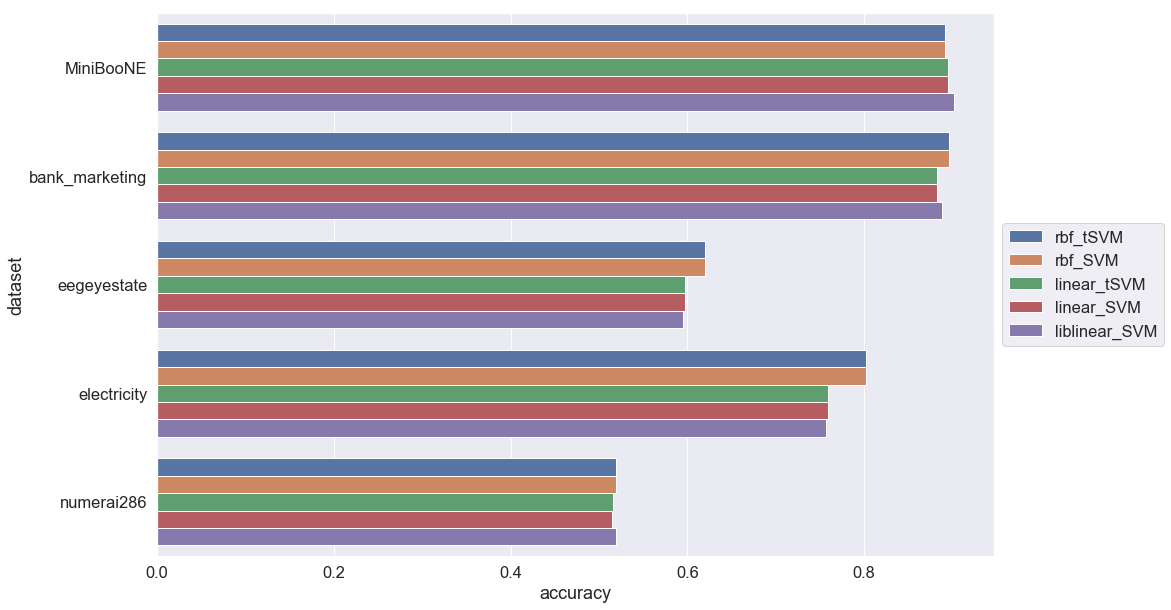

In [110]:
df2=a_pinakas_2.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','accuracy']
sns.barplot(data=df2,y='dataset',x='accuracy',hue='algorithm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10

plt.show()

In [141]:
t_pinakas_2_1 = t_pinakas_2.iloc[1:4:]


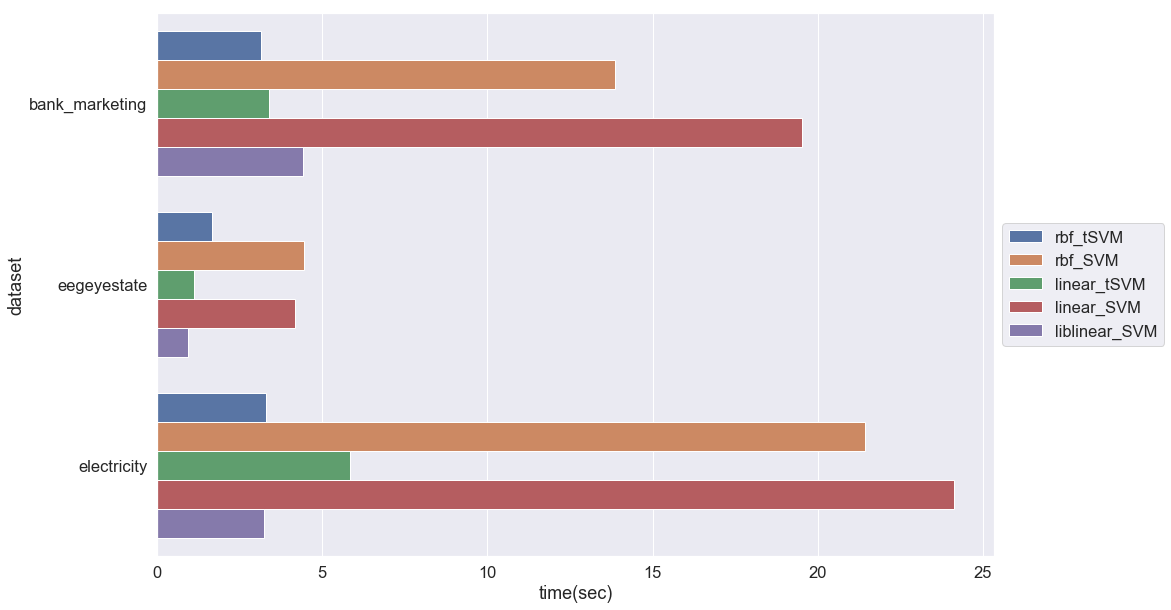

In [142]:




df2=t_pinakas_2_1.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','time(sec)']
ax = sns.barplot(data=df2,y='dataset',x='time(sec)',hue='algorithm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10



plt.show()

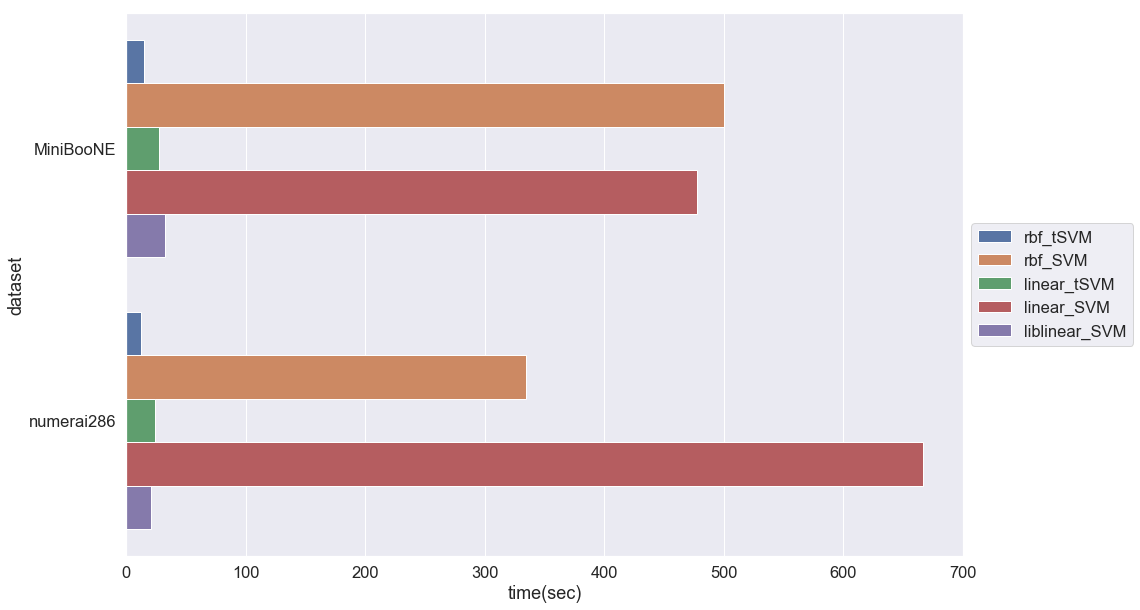

In [143]:
df2=t_pinakas_2_2.stack()
df2 = df2.reset_index()
df2.columns = ['dataset','algorithm','time(sec)']
ax = sns.barplot(data=df2,y='dataset',x='time(sec)',hue='algorithm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
rcParams['figure.figsize'] = 15,10



plt.show()

In [148]:
t_pinakas_2

,rbf_tSVM,rbf_SVM,linear_tSVM,linear_SVM,liblinear_SVM
dataset,,,,,
MiniBooNE,14.593750,500.046875,27.703125,477.250000,32.734375
bank_marketing,3.140625,13.859375,3.406250,19.515625,4.406250
eegeyestate,1.671875,4.437500,1.125000,4.187500,0.953125
electricity,3.296875,21.437500,5.843750,24.125000,3.250000
numerai286,12.500000,334.546875,24.140625,666.906250,20.859375


In [173]:
trbf_faster_rbf = t_pinakas_2.iloc[:,1] / t_pinakas_2.iloc[:,0]
tlinear_faster_linear = t_pinakas_2.iloc[:,3] / t_pinakas_2.iloc[:,2]
tlinear_faster_liblinear = t_pinakas_2.iloc[:,2] / t_pinakas_2.iloc[:,4]

In [172]:
print('Διαφορά απόδοσης tRBF vs RBF')
trbf_faster_rbf


Διαφορά απόδοσης tRBF vs RBF
Μέσος όρος 11.68662211967368


In [174]:
print("Μέσος όρος", trbf_faster_rbf.mean())

Μέσος όρος 14.919542912112457


In [175]:
print('Διαφορά απόδοσης tlinear vs linear')
tlinear_faster_linear

Διαφορά απόδοσης tlinear vs linear


dataset
MiniBooNE         17.227298
bank_marketing     5.729358
eegeyestate        3.722222
electricity        4.128342
numerai286        27.625890
dtype: float64

In [176]:
print("Μέσος όρος",tlinear_faster_linear.mean())

Μέσος όρος 11.68662211967368


In [177]:
print('Διαφορά απόδοσης tlinear vs liblinear')
tlinear_faster_liblinear

Διαφορά απόδοσης tlinear vs liblinear


dataset
MiniBooNE         0.846301
bank_marketing    0.773050
eegeyestate       1.180328
electricity       1.798077
numerai286        1.157303
dtype: float64

In [179]:
print("Μέσος όρος",tlinear_faster_liblinear.mean())

Μέσος όρος 1.1510117048192847


In [180]:
a_pinakas_2

,rbf_tSVM,rbf_SVM,linear_tSVM,linear_SVM,liblinear_SVM
dataset,,,,,
MiniBooNE,0.891285,0.891247,0.895052,0.895052,0.901741
bank_marketing,0.895942,0.895942,0.882451,0.882451,0.887869
eegeyestate,0.619826,0.619826,0.597463,0.597463,0.595127
electricity,0.802273,0.802383,0.759020,0.759131,0.757034
numerai286,0.519570,0.519622,0.515365,0.515314,0.519414
